# lec05_CNN(Convlution NN)
* 합성곱신경망


<img src ="https://miro.medium.com/v2/resize:fit:640/format:webp/1*uAeANQIOQPqWZnnuH-VEyw.jpeg">

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas_profiling

# ----------------- 학습 ----------------------
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# ----------------- 모델 ----------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

# ----------------- 평가 ----------------------
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error,f1_score,

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.layers import Dropout, Conv2D, MaxPool2D, Flatten, Dense
from keras.initializers import GlorotNormal,HeNormal,   RandomNormal, Zeros, Identity , Orthogonal , Constant , VarianceScaling


# seed 고정

In [4]:
tf.random.set_seed(1)
np.random.seed(1)

# data load

In [5]:
from keras.datasets import mnist

In [6]:
(X_train,y_train),(X_test, y_test) = mnist.load_data()  # (trainset), (testset)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [7]:
X_train[:1].shape # 1장, 28 * 28

(1, 28, 28)

In [8]:
y_train[:1]

array([5], dtype=uint8)

# 전처리 & 가공

## flatten

In [9]:
X_train = X_train.reshape(-1,784)
X_test = X_test.reshape(-1,784)

## 정규화

In [10]:
X_train_sc = X_train / 255.0
# 소숫점으로 나와야 되니까 255.0으로 나눈다  >> 확실히 float으로 할려고
X_test_sc  = X_test / 255.0
# X_train[:1]

# 모델

<pre>
<b>tf.keras.layers.Conv2D(filters, 
    kernel_size, 
    strides=(1, 1),
    padding='valid'(패딩 없다),
    activation=None,
    kernel_initializer(배치 정규화)='glorot_uniform',</b>
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,    
    use_bias=True,    
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

<pre>
tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
    **kwargs
)

## reshape prac

In [11]:
arr = np.arange(78400)
re_arr = arr.reshape(-1,28,28)
re_arr.shape

(100, 28, 28)

In [12]:
re_arr = re_arr.reshape(-1,28*28)
re_arr.shape

(100, 784)

In [13]:
re_arr = re_arr = re_arr.reshape(-1,28,28,1)
re_arr.shape

(100, 28, 28, 1)

In [14]:
X_train_sc.shape
# X_train_sc= X_train_sc.reshape(60000,28,-1)

(60000, 784)

In [15]:
re_arr[1,... ].shape
# 차원 축소

(28, 28, 1)

In [16]:
print(np.expand_dims(re_arr,axis=0).shape,

np.expand_dims(re_arr,axis=1).shape)

(1, 100, 28, 28, 1) (100, 1, 28, 28, 1)


## reshape 실전

* X_train_sc.shape >>> (60000, 28, 28, 1) /// input_shape=(28,28,1)
    - 장수 뺀 나머지 입력!!!, 나중에 데이터 추가 할 수도 있다, 몇 장을 넣어도 모델 학습!!

In [17]:
X_train_sc = X_train_sc.reshape(-1,28,28)
X_train_sc = X_train_sc[:,:,:,None]
X_train_sc.shape


(60000, 28, 28, 1)

In [19]:
X_test_sc = X_test_sc.reshape(-1,28,28)
X_test_sc = X_test_sc[:,:,:,None]
X_test_sc.shape


(10000, 28, 28, 1)

In [20]:
model = Sequential()


#-----------------CNN


model.add(Conv2D(filters=16, input_shape=(28,28,1), kernel_size=(5,5), strides=(1, 1),padding='valid',activation="relu",kernel_initializer='glorot_uniform'))
# 내보내는 필터갯수가 16 
model.add(MaxPool2D(pool_size=(2, 2),strides=None,padding='valid',data_format=None))
# 필터 갯수 지정 안 한다, 사이즈 조정만 하는 거니까
model.add(Conv2D(filters=16, kernel_size=(5,5),activation="relu"))
# 내보내는 필터갯수가 16 
model.add(MaxPool2D(pool_size=(2, 2)))


#-----------------Fully Connected

model.add(Flatten())
model.add(Dense(units=50,  activation='relu'))    
model.add(Dense(units=10,  activation='softmax')) 
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          6416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 50)                1

In [ ]:
# model = Sequential()
# model.add(Dense(units=300, input_dim=784, activation='relu', kernel_initializer='glorot_normal')) #입력층
# model.add(Dense(units=100,  activation='relu'))              #히든레이어
# model.add(Dense(units=50,  activation='relu'))              #히든레이어
# model.add(Dense(units=10,  activation='softmax'))           #3종 출력층
# model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [21]:
fit_hisroty = model.fit(X_train_sc, y_train
                        , batch_size = 128
                        , validation_split=0.2, epochs=10)
print(fit_hisroty)
print ( model.evaluate(X_test_sc, y_test)  )
# [0.03670008108019829, 0.9873999953269958]

Epoch 1/10
375/375 [==============================] - 12s 29ms/step - loss: 0.3837 - accuracy: 0.8850 - val_loss: 0.1216 - val_accuracy: 0.9653
Epoch 2/10
375/375 [==============================] - 10s 28ms/step - loss: 0.1096 - accuracy: 0.9671 - val_loss: 0.1011 - val_accuracy: 0.9701
Epoch 3/10
375/375 [==============================] - 11s 28ms/step - loss: 0.0791 - accuracy: 0.9765 - val_loss: 0.0692 - val_accuracy: 0.9799
Epoch 4/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0616 - accuracy: 0.9809 - val_loss: 0.0595 - val_accuracy: 0.9829
Epoch 5/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0532 - accuracy: 0.9834 - val_loss: 0.0545 - val_accuracy: 0.9843
Epoch 6/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0444 - accuracy: 0.9860 - val_loss: 0.0615 - val_accuracy: 0.9814
Epoch 7/10
375/375 [==============================] - 11s 31ms/step - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0533 - val_accuracy:

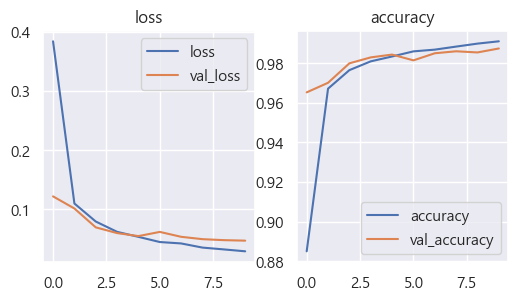

In [22]:
plt.figure(figsize=(6,3))
ax1 = plt.subplot(1,2,1)
ax1.plot(fit_hisroty.history['loss']    , label='loss')
ax1.plot(fit_hisroty.history['val_loss'], label='val_loss')
ax1.legend()
ax1.set_title("loss")

ax2 = plt.subplot(1,2,2)
ax2.plot(fit_hisroty.history['accuracy']    , label='accuracy')
ax2.plot(fit_hisroty.history['val_accuracy'], label='val_accuracy')
ax2.legend()
ax2.set_title("accuracy")

plt.show()

# 예측

## 예측

In [ ]:
proba = model.predict(X_test_sc)
y_test.shape

In [ ]:
pred = np.argmax(proba, axis=1)
y_test = np.argmax(y_test, axis=1)
print(pred[:3], y_test)

<pre>
다층 퍼셉트론  >> 은닉층 하나
심층신경망 DNN >> 은닉층 최소 2개